packages
=================

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
import time
from sympy import Matrix
from sympy import *

get the inverse
===================

In [ ]:
m = 3

A = np.random.randn(m, m)

Ainv = np.linalg.inv(A)

idm = A@Ainv

idm

array([[ 1.00000000e+00,  3.22983003e-17, -1.43843060e-16],
       [ 1.74414978e-18,  1.00000000e+00, -1.82546421e-17],
       [ 6.06709417e-18,  2.19827778e-16,  1.00000000e+00]])

Text(0.5, 1.0, 'mul')

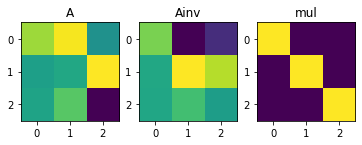

In [ ]:
plt.subplot(131)
plt.imshow(A)
plt.title('A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Ainv')

plt.subplot(133)
plt.imshow(A@Ainv)
plt.title('mul')

via rref
===============
if we want to calculate inverse matrix of $A$, we need to calculate:
$$reff([A | I]) = [I|A^{-1}]$$

In [ ]:
m = 4
A = Matrix(np.round(10*np.random.randn(m,m)), dtype='float')

Aaug = Matrix(np.concatenate((A, np.eye(m,m)),axis=1))
print(f"Aaug's shape is {Aaug.shape}")

Aaug's shape is (4, 8)


In [ ]:
Asol = Aaug.rref()
Asol

(Matrix([
 [1, 0, 0, 0, 0.0438640339915021,     -0.02511872031992,   -0.10734816295926, -0.0044988752811797],
 [0, 1, 0, 0,  0.106223444138965, -0.000999750062484379, -0.0092476880779805,  0.0147463134216446],
 [0, 0, 1, 0, 0.0400524868782804,   -0.0656710822294426,  0.0800424893776556, -0.0938515371157211],
 [0, 0, 0, 1, 0.0439265183704074,  -0.00806048487878031, -0.0120594851287178, -0.0686078480379905]]),
 (0, 1, 2, 3))

we need to get the Asol's data

In [13]:
Asol = Asol[0]
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()

plot

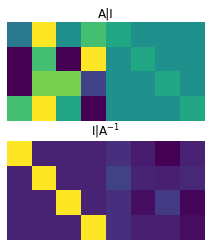

In [20]:
plt.subplot(211)
plt.imshow(matrix2numpy(Aaug, dtype='float'), vmin=-5, vmax=5)
plt.title('A|I'), plt.axis('off')

plt.subplot(212)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis('off')

plt.show()

inverse of diagonal matrix
========================

In [22]:
A = np.array([[2, 0],[0, 3]])
print(np.linalg.inv(A))

[[0.5        0.        ]
 [0.         0.33333333]]


left inverse and right inverse
==================

In [26]:
m = 6
n = 3

A = np.random.randn(m, n)
AtA = A.T@A
AAt = A@A.T

print(f"rank of AtA: {np.linalg.matrix_rank(AtA)}, shape is {AtA.shape}")
print(f"rank of AAt: {np.linalg.matrix_rank(AAt)}, shape is {AAt.shape}")

rank of AtA: 3, shape is (3, 3)
rank of AAt: 3, shape is (6, 6)


In [29]:
# left inverse
Al = np.linalg.inv(AtA)@A.T

# right inverse
Ar = A.T@np.linalg.inv(AAt)

print(Al.shape, Ar.shape)

(3, 6) (3, 6)


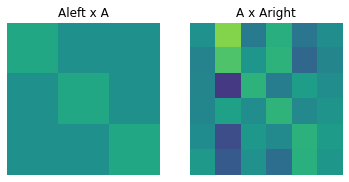

In [36]:
plt.subplot(121)
plt.imshow(Al@A, vmin=-5, vmax=5)
plt.title(f"Aleft x A"), plt.axis('off')

plt.subplot(122)
plt.imshow(A@Ar, vmin=-5, vmax=5)
plt.title('A x Aright'), plt.axis('off')

plt.show()

you will find if m > n, A has left inverse  
if m < m, A has right inverse

pseudoinverse
====================
rectangle matrix

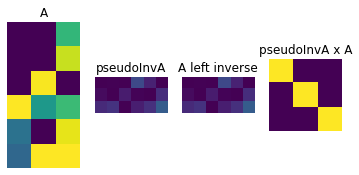

In [48]:
m = 6
n = 3
A = np.random.randn(m, n)
pseudoInvA = np.linalg.pinv(A)
# get left inverse matrix
AtA = A.T@A
Al = np.linalg.inv(AtA)@A.T

plt.subplot(141)
plt.imshow(A, vmin=0, vmax=1)
plt.title(f"A"), plt.axis('off')

plt.subplot(142)
plt.imshow(pseudoInvA, vmin=0, vmax=1)
plt.title(f"pseudoInvA"), plt.axis('off')

plt.subplot(143)
plt.imshow(Al, vmin=0, vmax=1)
plt.title(f"A left inverse"), plt.axis('off')

plt.subplot(144)
plt.imshow(pseudoInvA@A, vmin=0, vmax=1)
plt.title(f"pseudoInvA x A"), plt.axis('off')
plt.show()

you can found that pseudoInv of A is the same as left inverse of A  
Let's now explore reduced rank matrix

In [50]:
n = 50
A = np.random.randn(n,n)

A[:,-1] = A[:,-2]

print(f"rank of A is {np.linalg.matrix_rank(A)}")

rank of A is 49


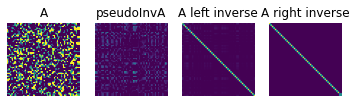

In [55]:
Ai = np.linalg.pinv(A)

plt.subplot(141)
plt.imshow(A, vmin=0, vmax=1)
plt.title(f"A"), plt.axis('off')

plt.subplot(142)
plt.imshow(Ai, vmin=0, vmax=1)
plt.title(f"pseudoInvA"), plt.axis('off')

plt.subplot(143)
plt.imshow(A@Ai, vmin=0, vmax=1)
plt.title(f"A left inverse"), plt.axis('off')

plt.subplot(144)
plt.imshow(Ai@A, vmin=0, vmax=1)
plt.title(f"A right inverse"), plt.axis('off')
plt.show()

It is similar to the identity matrix, but it is not exactly the identity matrix
$$AA^* \neq A^*A \neq I$$